In [ ]:
!pip install -q pyspark==3.4.1 spark-nlp==5.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.3/536.3 kB 21.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sparknlp
spark = sparknlp.start()

print("Spark NLP version: {}".format(sparknlp.version()))
print("Apache Spark version: {}".format(spark.version))

Spark NLP version: 5.1.2
Apache Spark version: 3.4.1


In [ ]:
import sparknlp

from sparknlp.base import *
from sparknlp.common import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
import pandas as pd

In [ ]:
df = spark.read.options(mode='FAILFAST',
                               header= True, multiline = True, inferSchema=True, escape='"').csv('/content/data-4.0.csv')

In [ ]:
from pyspark.sql.functions import col, count, when

total_rows = df.count()


In [ ]:
from pyspark.sql.functions import col, sum

missing_values_counts = df.select([sum(col(c).isNull().cast('int')).alias(c) for c in df.columns])

missing_values_counts.show()

missing_values_percentages = missing_values_counts.select([
    ((col(c) / total_rows) * 100).alias(c + '_missing_percentage')
    for c in df.columns
])

missing_values_percentages.show()

+--------------+----------------+-----------------+------+--------------------------+----------------------+----------------------------+-----------+---------------------+---------------------+------------------+------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+---------------------------------+---------------------------------+------------------------------------+---------------------------------+------------------------------+--------------------------------------------+---------------------------------+---------------------------------+------------------------------------+---------------------------------+------------------------------+--------------------------------------------+-----------------+--------------+---+------+
|Marital_status|Application_mode|Application_order|Course|Daytime_evening_attendance|Previous_qualification|Previous_qualification_grade|Nacionality|Moth

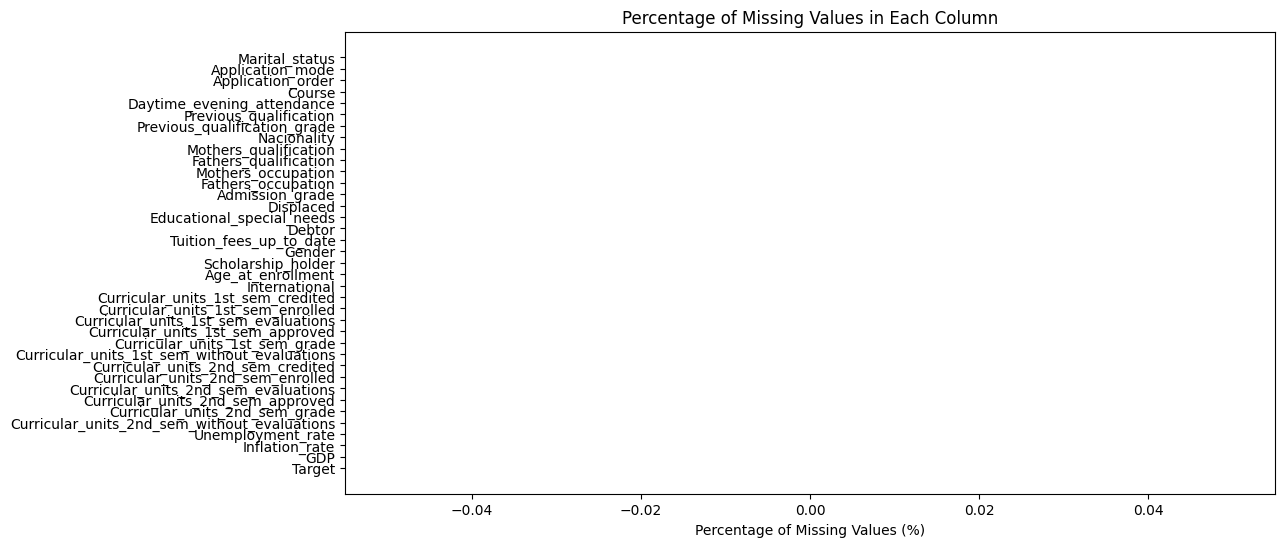

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

missing_values_pd = missing_values_percentages.toPandas()

columns = [c[:-19] for c in missing_values_pd.columns]
missing_percentages = [float(missing_values_pd.iloc[0][c]) for c in missing_values_pd.columns]

plt.figure(figsize=(12, 6))
plt.barh(columns, missing_percentages, color='skyblue')
plt.xlabel('Percentage of Missing Values (%)')
plt.title('Percentage of Missing Values in Each Column')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from pyspark.sql.functions import col

duplicate_rows = df.exceptAll(df.dropDuplicates())

if duplicate_rows.count() > 0:
    print("Duplicate rows found in DataFrame:")
    duplicate_rows.show(truncate=False)
else:
    print("No duplicate rows found in DataFrame.")


No duplicate rows found in DataFrame.


In [ ]:
df.dtypes

[('Marital_status', 'int'),
 ('Application_mode', 'int'),
 ('Application_order', 'int'),
 ('Course', 'int'),
 ('Daytime_evening_attendance', 'int'),
 ('Previous_qualification', 'int'),
 ('Previous_qualification_grade', 'double'),
 ('Nacionality', 'int'),
 ('Mothers_qualification', 'int'),
 ('Fathers_qualification', 'int'),
 ('Mothers_occupation', 'int'),
 ('Fathers_occupation', 'int'),
 ('Admission_grade', 'double'),
 ('Displaced', 'int'),
 ('Educational_special_needs', 'int'),
 ('Debtor', 'int'),
 ('Tuition_fees_up_to_date', 'int'),
 ('Gender', 'int'),
 ('Scholarship_holder', 'int'),
 ('Age_at_enrollment', 'int'),
 ('International', 'int'),
 ('Curricular_units_1st_sem_credited', 'int'),
 ('Curricular_units_1st_sem_enrolled', 'int'),
 ('Curricular_units_1st_sem_evaluations', 'int'),
 ('Curricular_units_1st_sem_approved', 'int'),
 ('Curricular_units_1st_sem_grade', 'double'),
 ('Curricular_units_1st_sem_without_evaluations', 'int'),
 ('Curricular_units_2nd_sem_credited', 'int'),
 ('Curr

In [ ]:
df.show()

+--------------+----------------+-----------------+------+--------------------------+----------------------+----------------------------+-----------+---------------------+---------------------+------------------+------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+---------------------------------+---------------------------------+------------------------------------+---------------------------------+------------------------------+--------------------------------------------+---------------------------------+---------------------------------+------------------------------------+---------------------------------+------------------------------+--------------------------------------------+-----------------+--------------+-----+--------+
|Marital_status|Application_mode|Application_order|Course|Daytime_evening_attendance|Previous_qualification|Previous_qualification_grade|Nacionality|

In [ ]:
df.describe().show()

+-------+------------------+------------------+------------------+-----------------+--------------------------+----------------------+----------------------------+------------------+---------------------+---------------------+------------------+------------------+------------------+-------------------+-------------------------+-------------------+-----------------------+-------------------+-------------------+------------------+--------------------+---------------------------------+---------------------------------+------------------------------------+---------------------------------+------------------------------+--------------------------------------------+---------------------------------+---------------------------------+------------------------------------+---------------------------------+------------------------------+--------------------------------------------+------------------+------------------+--------------------+--------+
|summary|    Marital_status|  Application_mode| 

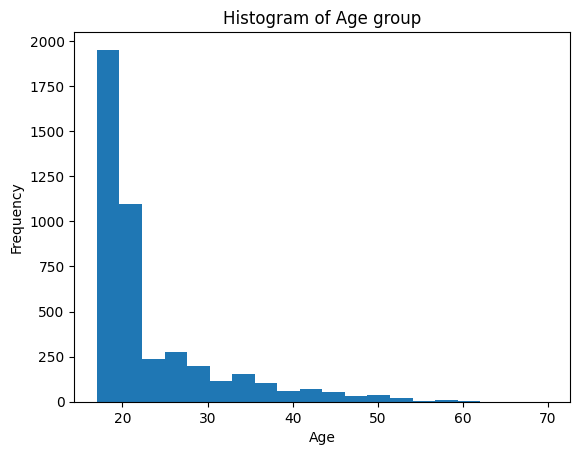

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df.select("Age_at_enrollment").rdd.flatMap(lambda x: x).collect(), bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age group")
plt.show()

In [ ]:
from pyspark.sql.functions import avg, count, when, col

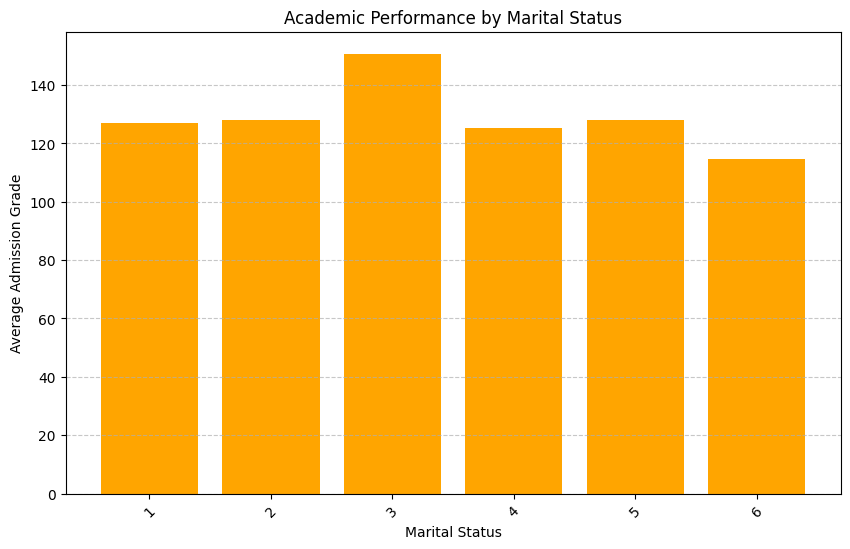

+--------------+-------------------+
|Marital_status|avg_admission_grade|
+--------------+-------------------+
|             1| 126.91309007399818|
|             2|  127.9451187335093|
|             3|            150.725|
|             4| 125.23076923076925|
|             5| 128.03600000000003|
|             6| 114.63333333333333|
+--------------+-------------------+



In [ ]:
performance_analysis = df.groupBy('Marital_status') \
    .agg(avg('Admission_grade').alias('avg_admission_grade')) \
    .orderBy('Marital_status')

performance_df = performance_analysis.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(performance_df['Marital_status'], performance_df['avg_admission_grade'], color='orange')
plt.xlabel('Marital Status')
plt.ylabel('Average Admission Grade')
plt.title('Academic Performance by Marital Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


performance_analysis.show()



In [ ]:
from pyspark.sql.functions import col, when

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [ ]:
from pyspark.sql import functions as F

nationality_counts = df.groupBy("Nacionality").agg(F.count("Nacionality").alias("Enrollments"))

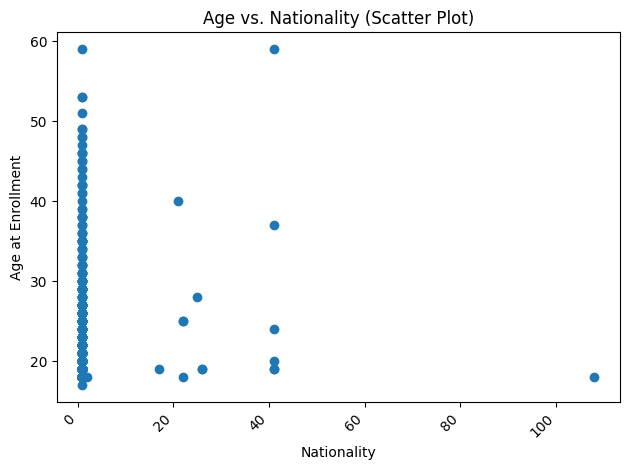

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

nationality_counts = df.groupBy("Nacionality").agg(F.count("Nacionality").alias("Enrollments"))
age_credits = df.select("Nacionality", "Age_at_enrollment")

if int(spark.version.split('.')[0]) >= 3:
  sampled_data = age_credits.sample(fraction=0.1)
else:
  sampled_data = age_credits.sample(False, 0.1)

nationalities = sampled_data.select("Nacionality").rdd.flatMap(lambda x: x).collect()
age_data = sampled_data.select("Age_at_enrollment").rdd.flatMap(lambda x: x).collect()


plt.scatter(nationalities, age_data)


plt.xlabel("Nationality")
plt.ylabel("Age at Enrollment")
plt.title("Age vs. Nationality (Scatter Plot)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import lag, lead, col

In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.regression import LinearRegression

In [ ]:
# Data Preprocessing
feature_cols = df.columns[:-1]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
indexer = StringIndexer(inputCol="Target", outputCol="label")

In [ ]:
# Linear Regression
lr = LinearRegression(featuresCol="features", labelCol="label")
lr_pipeline = Pipeline(stages=[assembler, indexer, lr])

In [ ]:
# Train-test split
(train_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Fit the linear regression model
lr_model = lr_pipeline.fit(train_data)

In [ ]:
# Make predictions
lr_predictions = lr_model.transform(test_data)

In [ ]:
# Evaluate Linear Regression model using RMSE
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(lr_predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

Root Mean Squared Error (RMSE) on test data: 0.6307522147155278


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

r2 = evaluator.evaluate(lr_predictions)

print(f"Coefficient of Determination (R^2) on test data: {r2}")

Coefficient of Determination (R^2) on test data: 0.29089388231928404


In [ ]:
# Classification (Random Forest)
rf = RandomForestClassifier(featuresCol="features", labelCol="label")
rf_pipeline = Pipeline(stages=[assembler, indexer, rf])

In [ ]:
# Fit the random forest classifier
rf_model = rf_pipeline.fit(train_data)

In [ ]:
# Make predictions
rf_predictions = rf_model.transform(test_data)

In [ ]:
# Evaluate Random Forest classifier using accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(rf_predictions)
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.7390272835112692
